- **Name:** Smruti Sonekar
- **Branch:** CSE DS
- **UID:** 2021700064
- **EXPNO:** 9th

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [91]:
data = pd.DataFrame(pd.read_csv('./files/fraud_oracle.csv'))
data = data.sample(1000)

In [92]:
data.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
2692,Jun,1,Wednesday,Accura,Rural,Thursday,Jun,1,Male,Married,...,more than 7,51 to 65,No,No,External,none,no change,1 vehicle,1994,All Perils
4063,May,3,Friday,Chevrolet,Urban,Friday,Jun,1,Male,Married,...,7 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils
5180,Jul,3,Tuesday,Pontiac,Urban,Tuesday,Aug,1,Male,Married,...,7 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,All Perils


In [93]:
df1=data[['AccidentArea','Sex','Age']]

In [94]:
df1.head(4)

,AccidentArea,Sex,Age
2692,Rural,Male,65
4063,Urban,Male,32
5180,Urban,Male,28
14633,Urban,Male,41


<Axes: xlabel='Age', ylabel='AccidentArea'>

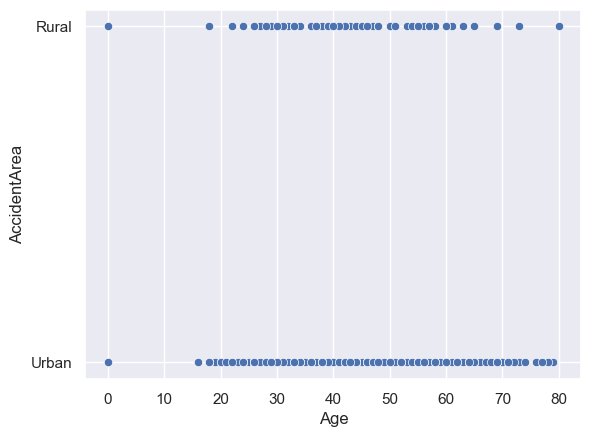

In [95]:
sns.scatterplot(data=df1,x="Age",y="AccidentArea")

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [97]:
x=df1[["Age"]]
y=df1["AccidentArea"]


In [98]:
y.value_counts()

AccidentArea
Urban    901
Rural     99
Name: count, dtype: int64

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [100]:
model=LogisticRegression()


In [101]:
model.fit(x_train,y_train)

LogisticRegression()

In [102]:
x_test.head(5)

,Age
10432,27
15002,52
3967,52
10800,32
14390,23


In [103]:
y_pred=model.predict(x_test)

In [104]:
model.score(x_test,y_test)

0.92

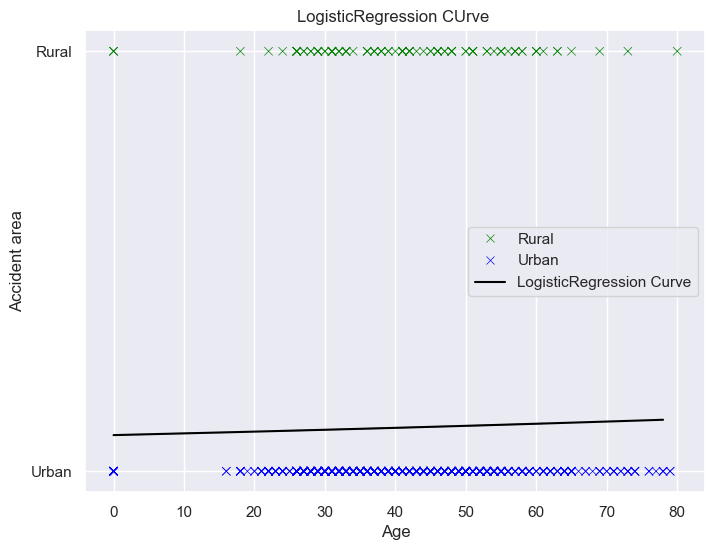

In [105]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

sns.scatterplot(data=df1,x="Age",y="AccidentArea",hue="AccidentArea",palette={"Urban":"blue","Rural":"green"},marker="x")

sns.lineplot(x=x_test["Age"],y=model.predict_proba(x_test)[:,1],color="black",label="LogisticRegression Curve")
plt.title("LogisticRegression CUrve ")
plt.xlabel("Age")
plt.ylabel("Accident area")
plt.legend()
plt.show()


**Confusion matrix tells how well model has done , it gives us true positives, true negatives, false positives, falsenegatives**

In [106]:
from sklearn.metrics import confusion_matrix,classification_report

In [107]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)


In [108]:
c_report=classification_report(y_test,y_pred)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [109]:
print("Confusion matrix between Age and Sex is :: \n",cm)

Confusion matrix between Age and Sex is :: 
 [[  0  16]
 [  0 184]]


In [110]:
print("Classification report :: \n",c_report)

Classification report :: 
               precision    recall  f1-score   support

       Rural       0.00      0.00      0.00        16
       Urban       0.92      1.00      0.96       184

    accuracy                           0.92       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.85      0.92      0.88       200

